In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

In [77]:
file_path = 'hiv.csv'
df = pd.read_csv(file_path)

In [78]:
df.describe()

,pid,time,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,cd820
count,2173.000000,2172.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2169.000000,2170.000000,2170.000000,2169.000000
mean,1070.986654,879.227901,35.213530,75.070098,95.416475,386.359411,56.945237,349.929000,370.829032,988.105530,935.645920
std,623.281227,292.326318,8.715498,13.257396,5.959814,472.186478,67.552328,118.424694,144.948333,485.114986,447.113438
min,0.000000,14.000000,12.000000,31.000000,70.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000
25%,531.000000,727.750000,29.000000,66.679200,90.000000,0.000000,0.000000,262.000000,268.250000,654.250000,630.000000
50%,1074.000000,997.000000,34.000000,74.390400,100.000000,155.000000,22.000000,340.000000,353.000000,892.500000,864.000000
75%,1609.000000,1090.250000,40.000000,82.555200,100.000000,754.000000,111.000000,422.000000,460.000000,1206.000000,1146.000000
max,2138.000000,1231.000000,70.000000,159.939360,100.000000,2851.000000,208.000000,1199.000000,1119.000000,5011.000000,6035.000000


In [79]:
df.columns

Index(['pid', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'target', 'str2'],
      dtype='object')

In [80]:
df.isnull().sum()

pid        0
time       1
trt        2
age        0
wtkg       0
hemo       2
homo       3
drugs      2
karnof     0
oprior     1
z30        1
zprior     1
preanti    0
race       4
gender     2
strat      0
symptom    1
treat      2
offtrt     4
cd40       4
cd420      3
cd80       3
cd820      4
target     0
str2       4
dtype: int64

In [81]:
#getting the datatype of all columns and printing it
all_dtypes = df.dtypes
print(all_dtypes)

pid          int64
time       float64
trt         object
age          int64
wtkg       float64
hemo        object
homo        object
drugs       object
karnof       int64
oprior      object
z30         object
zprior      object
preanti      int64
race        object
gender      object
strat        int64
symptom     object
treat       object
offtrt      object
cd40       float64
cd420      float64
cd80       float64
cd820      float64
target      object
str2        object
dtype: object


In [82]:

#removing duplicate rows
df = df.drop_duplicates()

In [83]:
#Converting the wtkg column into numeric and handling non-numeric values with NaN Values
df['wtkg'] = pd.to_numeric(df['wtkg'], errors='coerce')

In [84]:
all_dtypes = df.dtypes
print(all_dtypes)

pid          int64
time       float64
trt         object
age          int64
wtkg       float64
hemo        object
homo        object
drugs       object
karnof       int64
oprior      object
z30         object
zprior      object
preanti      int64
race        object
gender      object
strat        int64
symptom     object
treat       object
offtrt      object
cd40       float64
cd420      float64
cd80       float64
cd820      float64
target      object
str2        object
dtype: object


In [85]:
# Listing the columns with text and print its unique values
print(df['trt'].unique())
print(df['hemo'].unique())
print(df['homo'].unique())
print(df['drugs'].unique())
print(df['oprior'].unique())
print(df['z30'].unique())
print(df['zprior'].unique())
print(df['race'].unique())
print(df['gender'].unique())
print(df['str2'].unique())
print(df['symptom'].unique())
print(df['treat'].unique())
print(df['offtrt'].unique())

['ZDV + Zal' 'ddl only' 'ZDV only' 'ZDV + ddl' nan 'ddl alone' 'zdv + ddl'
 'zdv alone' 'ZDV + zal' 'ZDV + ZAL' 'ZDV and Zal' 'zdv and Zal']
['No' nan 'nope' 'no' 'Yes' 'yes']
['No' 'Yes' 'Yup' nan 'yup' 'no' 'yes']
['No' nan 'Yes' 'Nah' 'Yup' 'none' 'nah' 'yes' 'no']
['No' 'Yes' nan 'no']
['No' 'Yes' nan 'nope' 'yes' 'no']
['Yes' nan 'No' 'yes']
['White' 'white' 'Non White' nan 'Asian' 'African American' 'African'
 'Non-White' 'Latinx' 'african' 'AAPI' 'Arab' 'European' 'brown']
['female' 'Female' 'Male' 'male' nan]
['naive' 'experienced' nan]
['asymp' 'symp' 'sympomatic' 'asymptomatic' 'Asympomatic' 'Sympomatic' nan
 'sympTomatic' 'AsYmptomAtic']
['others' 'ZDV only' 'zdv' nan 'ZDV alone' 'ZDV' 'zdv only' 'other'
 'Others']
['No' 'Yes' 'no' 'yes' nan]


In [86]:
#converting all the text columns into lowercase
df['trt']=df['trt'].str.lower()
df['hemo']=df['hemo'].str.lower()
df['homo']=df['homo'].str.lower()
df['drugs']=df['drugs'].str.lower()
df['oprior']=df['oprior'].str.lower()
df['z30']=df['z30'].str.lower()
df['zprior']=df['zprior'].str.lower()
df['race']=df['race'].str.lower()
df['gender']=df['gender'].str.lower()
df['str2']=df['str2'].str.lower()
df['symptom']=df['symptom'].str.lower()
df['treat']=df['treat'].str.lower()
df['offtrt']=df['offtrt'].str.lower()

In [87]:
print(df['trt'].unique())
print(df['hemo'].unique())
print(df['homo'].unique())
print(df['drugs'].unique())
print(df['oprior'].unique())
print(df['z30'].unique())
print(df['zprior'].unique())
print(df['race'].unique())
print(df['gender'].unique())
print(df['str2'].unique())
print(df['symptom'].unique())
print(df['treat'].unique())
print(df['offtrt'].unique())

['zdv + zal' 'ddl only' 'zdv only' 'zdv + ddl' nan 'ddl alone' 'zdv alone'
 'zdv and zal']
['no' nan 'nope' 'yes']
['no' 'yes' 'yup' nan]
['no' nan 'yes' 'nah' 'yup' 'none']
['no' 'yes' nan]
['no' 'yes' nan 'nope']
['yes' nan 'no']
['white' 'non white' nan 'asian' 'african american' 'african' 'non-white'
 'latinx' 'aapi' 'arab' 'european' 'brown']
['female' 'male' nan]
['naive' 'experienced' nan]
['asymp' 'symp' 'sympomatic' 'asymptomatic' 'asympomatic' nan
 'symptomatic']
['others' 'zdv only' 'zdv' nan 'zdv alone' 'other']
['no' 'yes' nan]


In [88]:
#we replace typographical errors with correct values or we replace it with NaN
df = df.replace({
            'trt':{'zdv and zal':'zdv + zal','zdv alone':'zdv', 'ddl only':'ddl', 'ddl alone':'ddl', 'zdv only':'zdv'},
            'hemo':{'nope':'no'},
            'homo':{'yup':'yes'},
            'z30':{'nope':'no'},
            'drugs' : {'nah': 'no', 'yup': 'yes', 'none': np.nan},
            'race' : {'non white': 'non-white', 'asian': 'non-white', 'african american': 'non-white', 'african': 'non-white', 'latinx': 'non-white', 'aapi': 'non-white', 'arab': 'non-white', 'brown': 'non-white', 'european': 'white'},
            'symptom' : {'sympomatic': 'symp', 'asymptomatic': 'asymp', 'asympomatic': 'asymp', 'symptomatic': 'symp'},
            'treat' : {'zdv alone': 'zdv', 'zdv only': 'zdv', 'other' : 'others'}
            })

In [89]:
'''
df['trt'] = np.where(~df['trt'].isin(['ddl','zdv','zdv + zal','zdv + ddl']), np.nan, df['trt'])
df['hemo'] = np.where(~df['hemo'].isin(['no','yes']), np.nan, df['hemo'])
df['homo'] = np.where(~df['homo'].isin(['no','yes']), np.nan, df['homo'])
df['drugs'] = np.where(~df['drugs'].isin(['no','yes']), np.nan, df['drugs'])
df['oprior'] = np.where(~df['oprior'].isin(['no','yes']), np.nan, df['oprior'])
df['z30'] = np.where(~df['z30'].isin(['no','yes']), np.nan, df['z30'])
df['zprior'] = np.where(~df['zprior'].isin(['no','yes']), np.nan, df['zprior'])
df['race'] = np.where(~df['race'].isin(['white','non-white']), np.nan, df['race'])
df['gender'] = np.where(~df['gender'].isin(['female','male']), np.nan, df['gender'])
df['str2'] = np.where(~df['str2'].isin(['naive','experienced']), np.nan, df['str2'])
df['symptom'] = np.where(~df['symptom'].isin(['asymp','symp']), np.nan, df['symptom'])
df['treat'] = np.where(~df['treat'].isin(['others' 'zdv']), np.nan, df['treat'])
df['offtrt'] = np.where(~df['offtrt'].isin(['no','yes']), np.nan, df['offtrt'])
'''   

"\ndf['trt'] = np.where(~df['trt'].isin(['ddl','zdv','zdv + zal','zdv + ddl']), np.nan, df['trt'])\ndf['hemo'] = np.where(~df['hemo'].isin(['no','yes']), np.nan, df['hemo'])\ndf['homo'] = np.where(~df['homo'].isin(['no','yes']), np.nan, df['homo'])\ndf['drugs'] = np.where(~df['drugs'].isin(['no','yes']), np.nan, df['drugs'])\ndf['oprior'] = np.where(~df['oprior'].isin(['no','yes']), np.nan, df['oprior'])\ndf['z30'] = np.where(~df['z30'].isin(['no','yes']), np.nan, df['z30'])\ndf['zprior'] = np.where(~df['zprior'].isin(['no','yes']), np.nan, df['zprior'])\ndf['race'] = np.where(~df['race'].isin(['white','non-white']), np.nan, df['race'])\ndf['gender'] = np.where(~df['gender'].isin(['female','male']), np.nan, df['gender'])\ndf['str2'] = np.where(~df['str2'].isin(['naive','experienced']), np.nan, df['str2'])\ndf['symptom'] = np.where(~df['symptom'].isin(['asymp','symp']), np.nan, df['symptom'])\ndf['treat'] = np.where(~df['treat'].isin(['others' 'zdv']), np.nan, df['treat'])\ndf['offtrt']

In [91]:
df_copy = df.copy()
df_copy.head()

,pid,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,target,str2
0,0,948.0,zdv + zal,48,89.8128,no,no,no,100,no,...,0,asymp,others,no,422.0,477.0,566.0,324.0,censoring,naive
1,1,1002.0,ddl,61,49.4424,no,no,NaN,90,no,...,121,asymp,others,no,162.0,218.0,392.0,564.0,failure,experienced
2,2,961.0,ddl,45,88.4520,NaN,yes,yes,90,no,...,182,asymp,others,yes,326.0,274.0,2063.0,1893.0,censoring,experienced
3,3,1166.0,ddl,47,85.2768,no,yes,no,100,no,...,105,asymp,others,no,287.0,394.0,1590.0,966.0,censoring,experienced
4,4,1090.0,zdv,43,66.6792,no,yes,no,100,no,...,119,asymp,zdv,no,504.0,353.0,870.0,782.0,censoring,experienced


In [92]:
dropped_indices = df.dropna(subset=columns_nanValues).index
print(dropped_indices)
df.head()

Index([   0,    3,    4,    5,    6,    7,    8,    9,   10,   11,
       ...
       2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138],
      dtype='int64', length=2114)


,pid,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,target,str2
0,0,948.0,zdv + zal,48,89.8128,no,no,no,100,no,...,0,asymp,others,no,422.0,477.0,566.0,324.0,censoring,naive
1,1,1002.0,ddl,61,49.4424,no,no,NaN,90,no,...,121,asymp,others,no,162.0,218.0,392.0,564.0,failure,experienced
2,2,961.0,ddl,45,88.4520,NaN,yes,yes,90,no,...,182,asymp,others,yes,326.0,274.0,2063.0,1893.0,censoring,experienced
3,3,1166.0,ddl,47,85.2768,no,yes,no,100,no,...,105,asymp,others,no,287.0,394.0,1590.0,966.0,censoring,experienced
4,4,1090.0,zdv,43,66.6792,no,yes,no,100,no,...,119,asymp,zdv,no,504.0,353.0,870.0,782.0,censoring,experienced


In [62]:
#dropping the NaN values from text columns
columns_nanValues = ['trt', 'hemo', 'homo','drugs','oprior','z30','zprior','race','gender','str2','symptom','treat','offtrt']
df = df.dropna(subset=columns_nanValues)

In [63]:
print(df['trt'].unique())
print(df['hemo'].unique())
print(df['homo'].unique())
print(df['drugs'].unique())
print(df['oprior'].unique())
print(df['z30'].unique())
print(df['zprior'].unique())
print(df['race'].unique())
print(df['gender'].unique())
print(df['str2'].unique())
print(df['symptom'].unique())
print(df['treat'].unique())
print(df['offtrt'].unique())

['zdv + zal' 'ddl' 'zdv' 'zdv + ddl']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['white' 'non-white']
['female' 'male']
['naive' 'experienced']
['asymp' 'symp']
['others' 'zdv']
['no' 'yes']


In [64]:
#counting the missing values in each column
df.isna().sum()

pid        0
time       1
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
strat      0
symptom    0
treat      0
offtrt     0
cd40       4
cd420      3
cd80       3
cd820      3
target     0
str2       0
dtype: int64

In [65]:
df.dtypes

pid          int64
time       float64
trt         object
age          int64
wtkg       float64
hemo        object
homo        object
drugs       object
karnof       int64
oprior      object
z30         object
zprior      object
preanti      int64
race        object
gender      object
strat        int64
symptom     object
treat       object
offtrt      object
cd40       float64
cd420      float64
cd80       float64
cd820      float64
target      object
str2        object
dtype: object

In [66]:
# filling the null values in the numerical typle column with corresponding median values
df= df.fillna(value = {
    'time':df['time'].median(),
    'wtkg':df['wtkg'].median(),
    'cd40':df['cd40'].median(),
    'cd80':df['cd80'].median(),
    'cd820':df['cd820'].median(),
    'cd420':df['cd420'].median()})
imputation_values = {
    'time': df['time'].median(),
    'wtkg': df['wtkg'].median(),
    'cd40': df['cd40'].median(),
    'cd80': df['cd80'].median(),
    'cd820': df['cd820'].median(),
    'cd420': df['cd420'].median()
}

# Save the imputation values to a file
imputation_filename = 'imputer.pkl'
joblib.dump(imputation_values, imputation_filename)

['imputer.pkl']

In [67]:
df.isna().sum()

pid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
target     0
str2       0
dtype: int64

In [68]:
#converting the different decimals points to two decimal points for the column 'wtkg'
df.wtkg = df.wtkg.apply(lambda x: round(float(x), 2))

In [69]:
#label encoding with respective to the given columns
label_encoders = {}
columns = ['hemo','homo','drugs','oprior','z30','zprior','race','gender','str2','symptom','treat','offtrt','target']

for col in columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
label_encoders_filename = 'label_encoders.pkl'
joblib.dump(label_encoders, label_encoders_filename)
#we cut the column 'strat' based the values because theortically this feature has different categorical values based on the actual values
df['strat'] = pd.cut(df['strat'], bins = np.array([-np.inf, 0, 52, np.inf]), labels = ['1','2','3'], right = True).astype(int)

In [70]:
df.head()

,pid,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,target,str2
0,0,948.0,zdv + zal,48,89.81,0,0,0,100,0,...,1,0,0,0,422.0,477.0,566.0,324.0,0,1
3,3,1166.0,ddl,47,85.28,0,1,0,100,0,...,3,0,0,0,287.0,394.0,1590.0,966.0,0,0
4,4,1090.0,zdv,43,66.68,0,1,0,100,0,...,3,0,1,0,504.0,353.0,870.0,782.0,0,0
5,5,1181.0,zdv + ddl,46,88.91,0,1,1,100,0,...,3,0,0,0,235.0,339.0,860.0,1060.0,0,0
6,6,794.0,zdv,31,73.03,0,1,0,100,0,...,3,0,1,0,244.0,225.0,708.0,699.0,1,0


In [25]:
#To encode categorical features with more than two categories using one hot encoding
df = pd.get_dummies(df, columns = ['trt','strat'], dtype=int)

# Save the one-hot encoding transformation
encoding_info = {
    'columns': ['trt', 'strat'],  # List of columns that were one-hot encoded
    'dummies': df.columns[df.columns.str.contains('trt_|strat_')].tolist()  # List of new dummy columns
}

# Save the encoding information to a file
encoding_filename = 'one_hot_encoding_info.pkl'
joblib.dump(encoding_info, encoding_filename)

['one_hot_encoding_info.pkl']

In [24]:
#correlation Matrix for all features
correlationMatrix = df.corr().abs()
correlationMatrix

,pid,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,cd820,target,str2,trt_ddl,trt_zdv,trt_zdv + ddl,trt_zdv + zal,strat_1,strat_2,strat_3
pid,1.000000,0.067756,0.159420,0.060118,0.364494,0.288793,0.019464,0.043116,0.017821,0.034261,...,0.041120,0.002635,0.045599,0.010575,0.010870,0.032743,1.101830e-02,0.045599,0.003591,0.043094
time,0.067756,1.000000,0.025766,0.008151,0.014639,0.047305,0.025332,0.092373,0.016090,0.010549,...,0.028745,0.574063,0.007037,0.035085,0.156247,0.071807,4.917491e-02,0.007037,0.024586,0.026902
age,0.159420,0.025766,1.000000,0.135915,0.228213,0.159755,0.078357,0.102104,0.057004,0.059487,...,0.038811,0.068210,0.066499,0.010758,0.000851,0.000240,1.038482e-02,0.066499,0.033540,0.094083
wtkg,0.060118,0.008151,0.135915,1.000000,0.074560,0.149958,0.004596,0.034246,0.008746,0.071635,...,0.085763,0.019454,0.077144,0.013554,0.043807,0.012508,1.761149e-02,0.077144,0.011563,0.068486
hemo,0.364494,0.014639,0.228213,0.074560,1.000000,0.392176,0.092220,0.068948,0.035153,0.110109,...,0.056267,0.013672,0.123929,0.005241,0.012314,0.002439,9.442490e-03,0.123929,0.013424,0.135797
homo,0.288793,0.047305,0.159755,0.149958,0.392176,1.000000,0.204191,0.041599,0.019498,0.047316,...,0.083183,0.054203,0.034928,0.016177,0.020894,0.000108,4.543135e-03,0.034928,0.043744,0.000014
drugs,0.019464,0.025332,0.078357,0.004596,0.092220,0.204191,1.000000,0.082054,0.029865,0.017754,...,0.022337,0.046964,0.004273,0.013822,0.020852,0.014268,2.079670e-02,0.004273,0.032551,0.021912
karnof,0.043116,0.092373,0.102104,0.034246,0.068948,0.041599,0.082054,1.000000,0.057740,0.078469,...,0.006392,0.103308,0.088834,0.029414,0.003329,0.006471,2.694479e-02,0.088834,0.087248,0.019307
oprior,0.017821,0.016090,0.057004,0.008746,0.035153,0.019498,0.029865,0.057740,1.000000,0.037624,...,0.036681,0.041289,0.126968,0.024199,0.032323,0.018772,1.106562e-02,0.126968,0.008118,0.121509
z30,0.034261,0.010549,0.059487,0.071635,0.110109,0.047316,0.017754,0.078469,0.037624,1.000000,...,0.016273,0.124774,0.903233,0.009765,0.006664,0.000600,1.607413e-02,0.903233,0.324663,0.649385


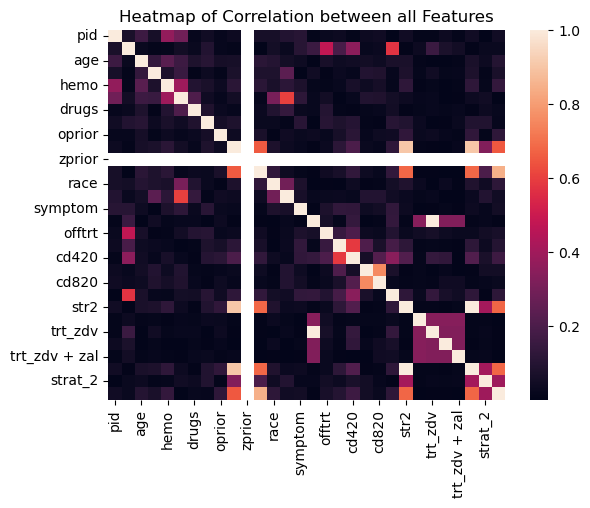

In [25]:
#plotting the heatmap of the correlation matrix
fig = sns.heatmap(correlationMatrix).set(title = "Heatmap of Correlation between all Features")
plt.show()

In [26]:
#removing the outliers from the boxplot containing outliers
def outlierIndexes(df, columnName, alpha = 1.5):
    Q1 = df[columnName].quantile(0.25)
    Q3 = df[columnName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - alpha*IQR
    upper = Q3 + alpha*IQR

    outlierArray = df[(df[columnName] < lower) | (df[columnName] > upper)]

    return outlierArray

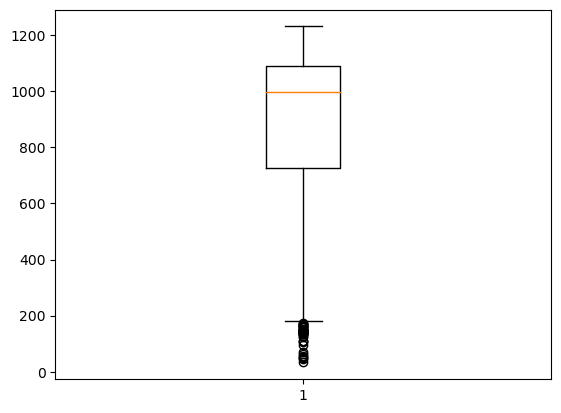

In [27]:
#Representation of the boxplot with given column
fig=plt.boxplot(df['time'])
plt.show()

In [28]:
#pruning the outliers using above function outlierIndex
outlierIndex = outlierIndexes(df, 'time', 1.5)
df.loc[outlierIndex.index, 'time'] = df['time'].median()

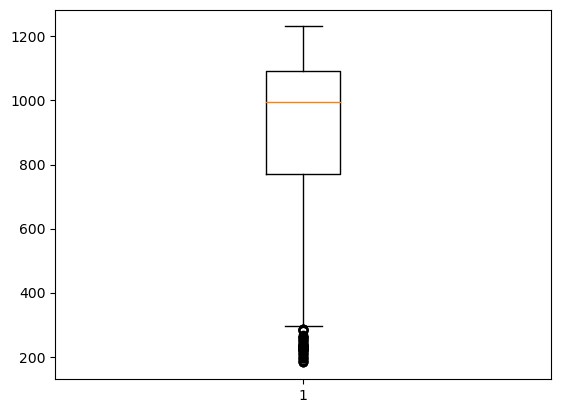

In [29]:
fig=plt.boxplot(df['time'])
plt.show()

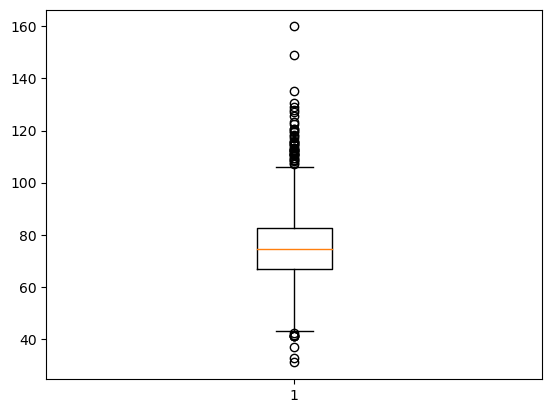

In [30]:
fig=plt.boxplot(df['wtkg'])
plt.show()

In [31]:
outlierIndex = outlierIndexes(df, 'wtkg', 1.5)
df.loc[outlierIndex.index, 'wtkg'] = df['wtkg'].median()

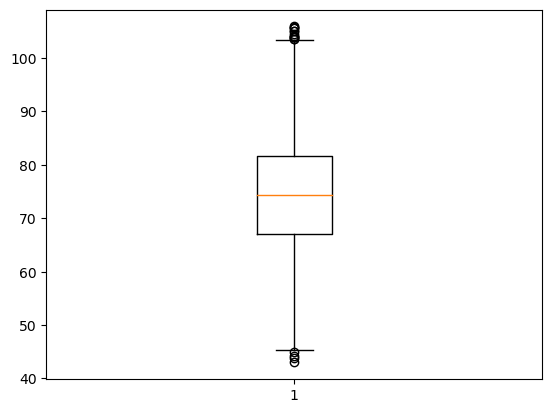

In [32]:
fig=plt.boxplot(df['wtkg'])
plt.show()

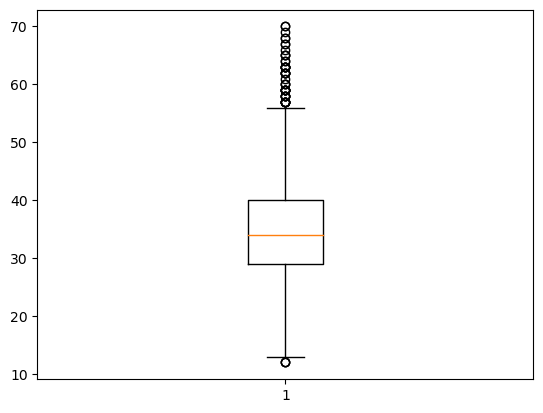

In [33]:
fig=plt.boxplot(df['age'])
plt.show()

In [34]:
outlierIndex = outlierIndexes(df, 'age', 1.5)
df.loc[outlierIndex.index, 'age'] = df['age'].median()

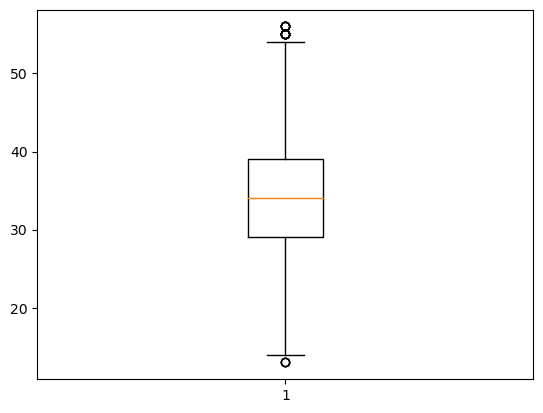

In [35]:
fig=plt.boxplot(df['age'])
plt.show()

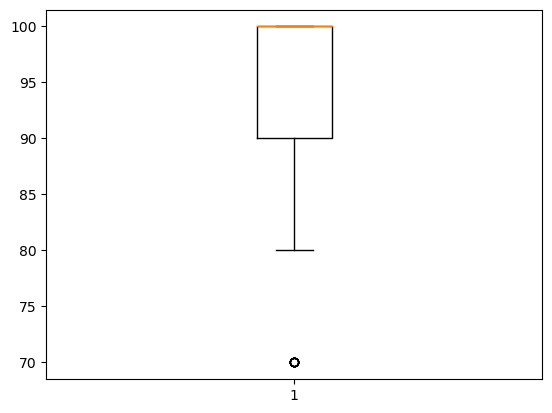

In [36]:
fig=plt.boxplot(df['karnof'])
plt.show()

In [37]:
outlierIndex = outlierIndexes(df, 'karnof', 1.5)
df.loc[outlierIndex.index, 'karnof'] = df['karnof'].median()

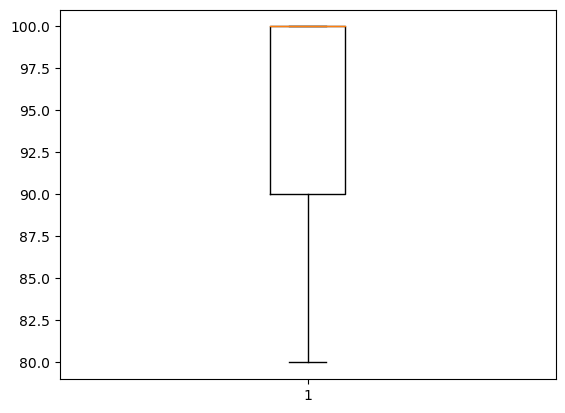

In [38]:
fig=plt.boxplot(df['karnof'])
plt.show()

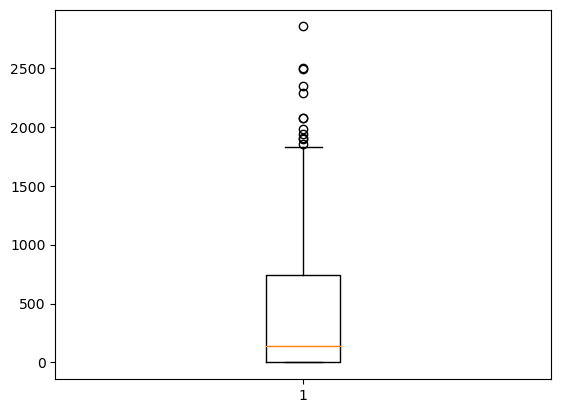

In [39]:
fig=plt.boxplot(df['preanti'])
plt.show()

In [40]:
outlierIndex = outlierIndexes(df, 'preanti', 1.5)
df.loc[outlierIndex.index, 'preanti'] = df['preanti'].median()

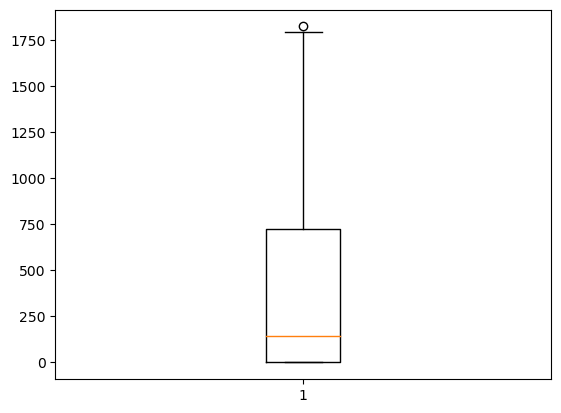

In [41]:
fig=plt.boxplot(df['preanti'])
plt.show()

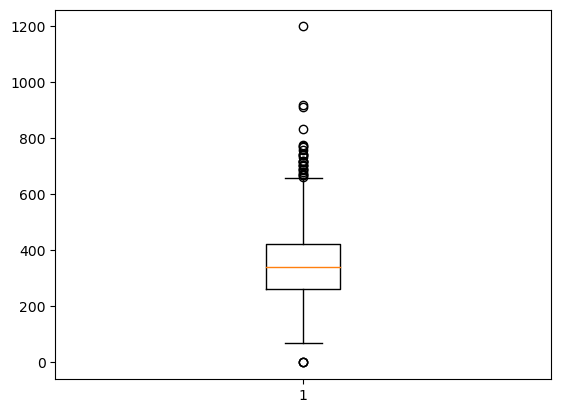

In [42]:
fig=plt.boxplot(df['cd40'])
plt.show()

In [43]:
outlierIndex = outlierIndexes(df, 'cd40', 1.5)
df.loc[outlierIndex.index, 'cd40'] = df['cd40'].median()

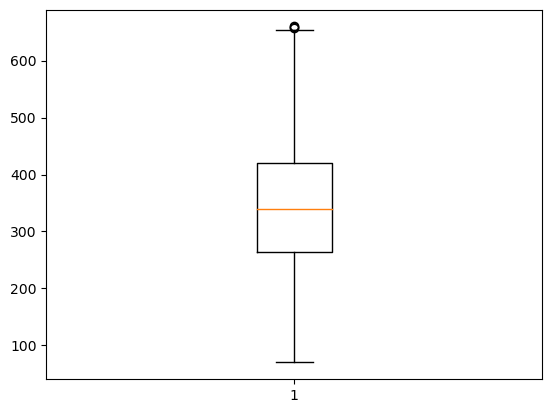

In [44]:
fig=plt.boxplot(df['cd40'])
plt.show()

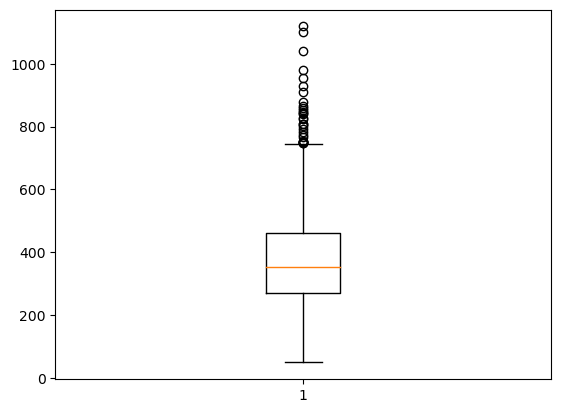

In [45]:
fig=plt.boxplot(df['cd420'])
plt.show()

In [46]:
outlierIndex = outlierIndexes(df, 'cd420', 1.5)
df.loc[outlierIndex.index, 'cd420'] = df['cd420'].median()

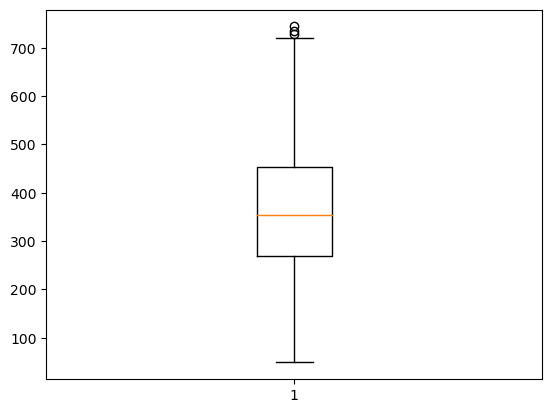

In [47]:
fig=plt.boxplot(df['cd420'])
plt.show()

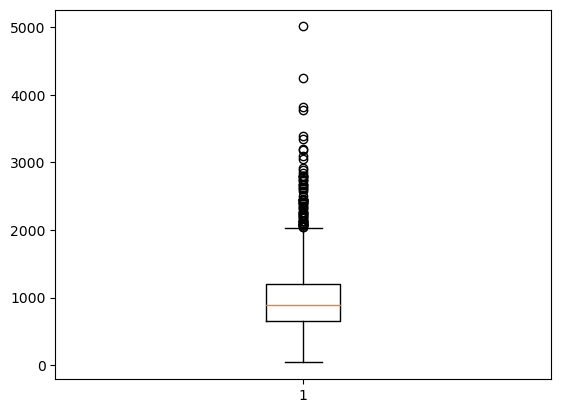

In [48]:
fig=plt.boxplot(df['cd80'])
plt.show()

In [49]:
outlierIndex = outlierIndexes(df, 'cd80', 1.5)
df.loc[outlierIndex.index, 'cd80'] = df['cd80'].median()

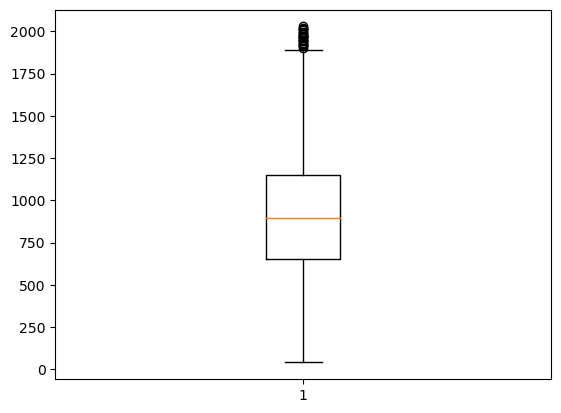

In [50]:
fig=plt.boxplot(df['cd80'])
plt.show()

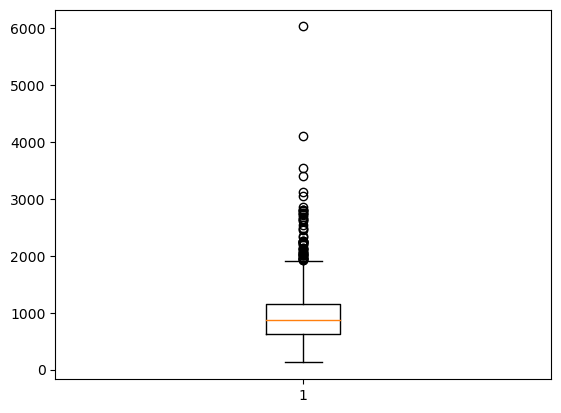

In [51]:
fig=plt.boxplot(df['cd820'])
plt.show()

In [52]:
outlierIndex = outlierIndexes(df, 'cd820', 1.5)
df.loc[outlierIndex.index, 'cd820'] = df['cd820'].median()

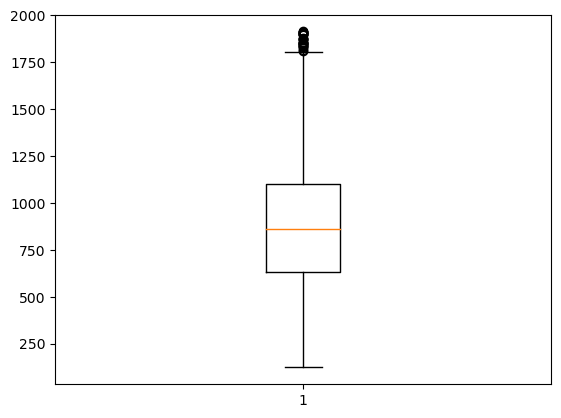

In [53]:
fig=plt.boxplot(df['cd820'])
plt.show()

In [54]:
#creating the custom feature in K Means Model of the columns age,race,gender,homo,drugs.
df_part = df[['age','race','gender','homo','drugs']]
df_part.wtbinned = pd.cut(df['wtkg'], bins = np.array([40,60,80,100,120]), labels = ['1','2','3','4']).astype(int)
clusters = 5
kmeans = KMeans(n_clusters=clusters)
df['new_feature'] = kmeans.fit_predict(df_part)

C:\Users\surya_eyj1nxg\AppData\Local\Temp\ipykernel_17280\1858547143.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_part.wtbinned = pd.cut(df['wtkg'], bins = np.array([40,60,80,100,120]), labels = ['1','2','3','4']).astype(int)
C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
df.describe()

,pid,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,target,str2,trt_ddl,trt_zdv,trt_zdv + ddl,trt_zdv + zal,strat_1,strat_2,strat_3,new_feature
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,...,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000
mean,1074.362346,898.075686,34.639546,74.438032,0.084201,0.662252,0.130558,95.581835,0.022233,0.549669,...,0.244087,0.414853,0.262062,0.247871,0.245033,0.245033,0.414853,0.191580,0.393567,2.317408
std,614.948377,269.628080,7.659685,11.334778,0.277754,0.473054,0.336996,5.678496,0.147474,0.497645,...,0.429646,0.492813,0.439860,0.431879,0.430209,0.430209,0.492813,0.393637,0.488656,1.355436
min,0.000000,182.000000,13.000000,43.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,542.250000,770.000000,29.000000,67.100000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1074.500000,996.000000,34.000000,74.390000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1607.750000,1091.000000,39.000000,81.650000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
max,2138.000000,1231.000000,56.000000,105.920000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


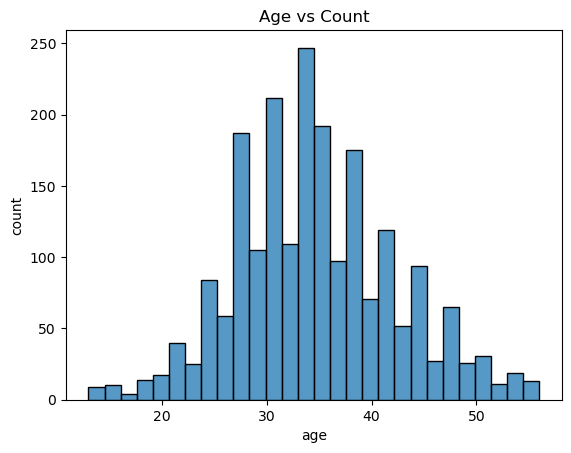

In [56]:
#Representation of the age column in histogram
sns.histplot(data=df, x=df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age vs Count')
plt.show()

C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


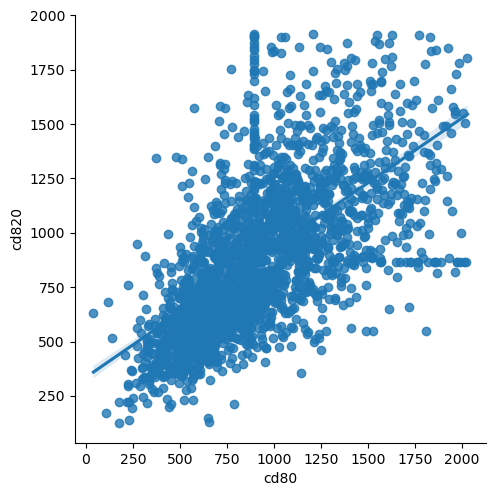

In [57]:
#Representation of the column cd80 vs cd 820 in pairplot
g= sns.pairplot(df , height=5, aspect =1, x_vars = ['cd80'] , y_vars =  ['cd820'] , kind = 'reg')

Text(0.5, 1.0, 'gender vs age')

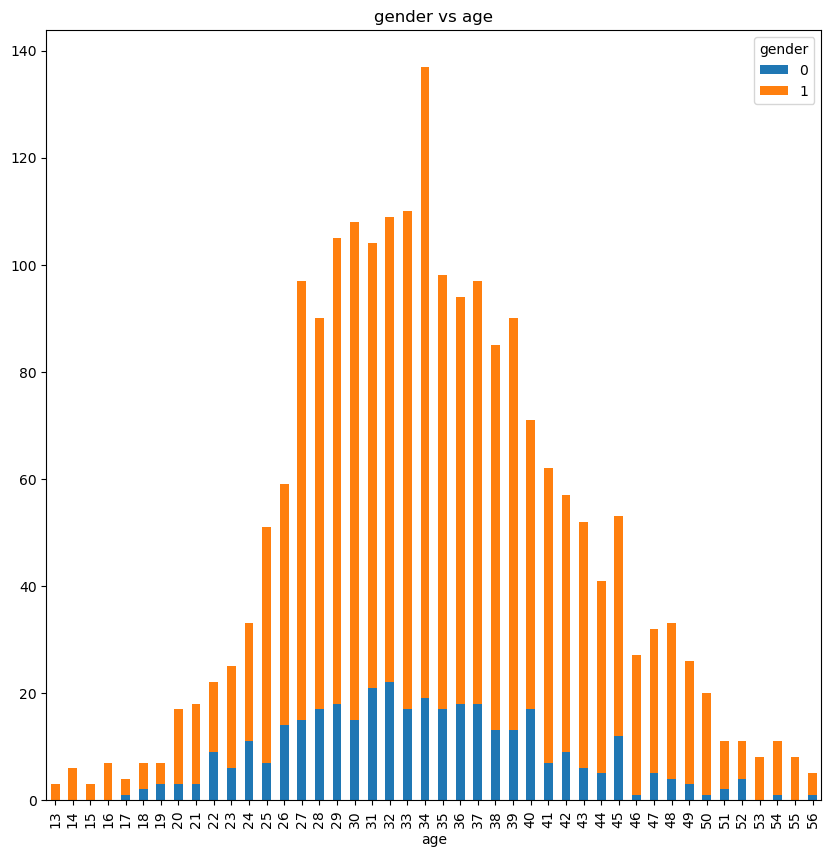

In [58]:
#Representation of the column Age vs Gender in Bargraph
age_gender_table= pd.crosstab(index=df["age"], columns=df["gender"])

age_gender_table.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('gender vs age')

C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


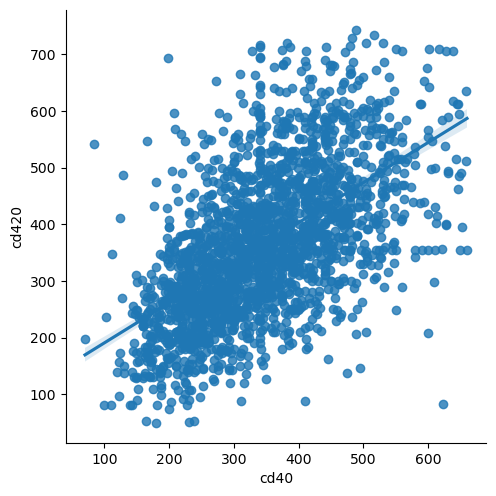

In [59]:
#Representation of the column cd40 vs cd 420 in pairplot
g= sns.pairplot(df , height=5, aspect =1, x_vars = ['cd40'] , y_vars =  ['cd420'] , kind = 'reg')

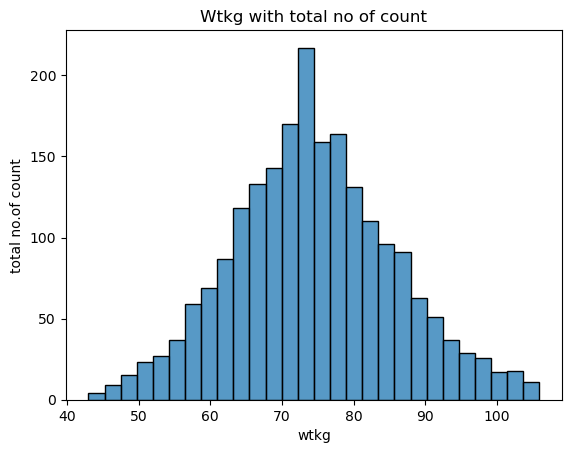

In [60]:
#Representation of the column wtkg in Histogram
sns.histplot(data=df, x=df['wtkg'])
plt.xlabel('wtkg')
plt.ylabel('total no.of count')
plt.title('Wtkg with total no of count')
plt.show()

Text(0.5, 1.0, 'age vs hemo')

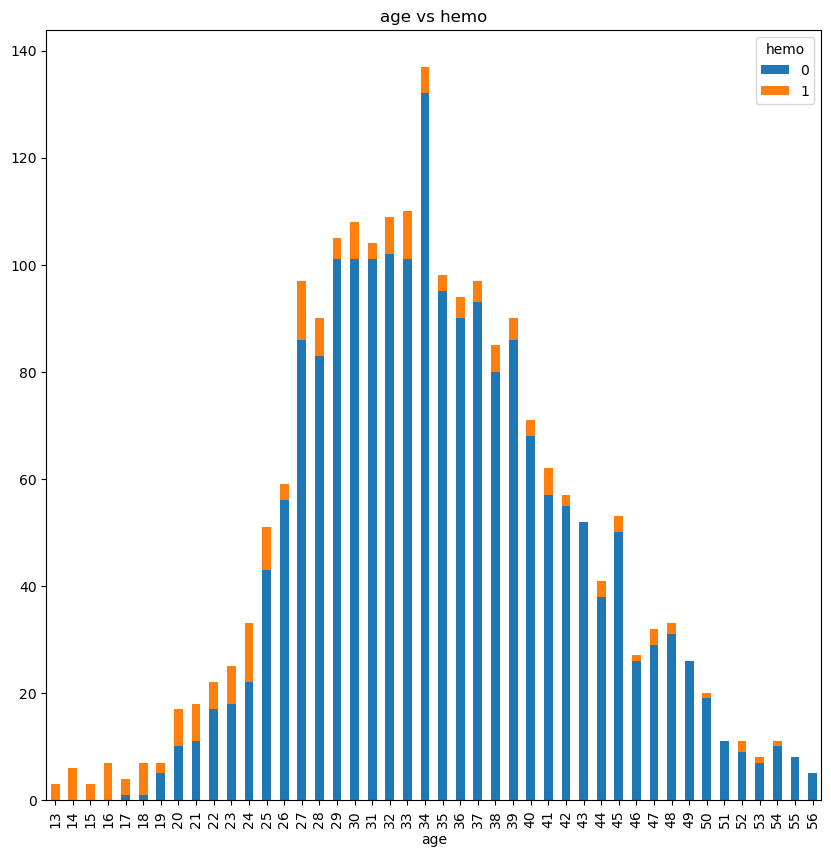

In [61]:
#Representation of the column age vs hemo in Crosstab plot
age_hemo_table= pd.crosstab(index=df["age"], columns=df["hemo"])

age_hemo_table.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('age vs hemo')

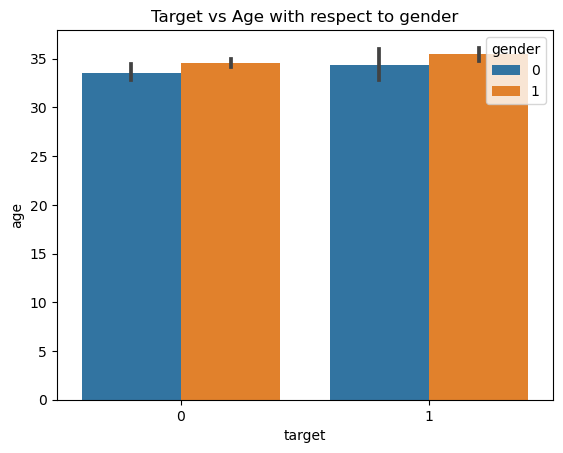

In [62]:
#Representation of the column target vs age with hue 'gender' in pairplot
sns.barplot(x='target',y='age', data=df,hue='gender')
plt.title('Target vs Age with respect to gender')
plt.show()

In [63]:
#Doing Normalization
columnsList = ['time','wtkg','age','karnof','preanti','cd40','cd420','cd80','cd820']
Normalizer = MinMaxScaler()
df[columnsList] = Normalizer.fit_transform(df[columnsList])

In [64]:
import joblib

In [65]:
# Save the scaler to a file
scaler_filename = 'minmax_scaler.pkl'
joblib.dump(Normalizer, scaler_filename)

['minmax_scaler.pkl']

In [66]:
df.describe()

,pid,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,target,str2,trt_ddl,trt_zdv,trt_zdv + ddl,trt_zdv + zal,strat_1,strat_2,strat_3,new_feature
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,...,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000
mean,1074.362346,0.682627,0.503245,0.499651,0.084201,0.662252,0.130558,0.779092,0.022233,0.549669,...,0.244087,0.414853,0.262062,0.247871,0.245033,0.245033,0.414853,0.191580,0.393567,2.317408
std,614.948377,0.257033,0.178132,0.180146,0.277754,0.473054,0.336996,0.283925,0.147474,0.497645,...,0.429646,0.492813,0.439860,0.431879,0.430209,0.430209,0.492813,0.393637,0.488656,1.355436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,542.250000,0.560534,0.372093,0.383026,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1074.500000,0.775977,0.488372,0.498887,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1607.750000,0.866540,0.604651,0.614272,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
max,2138.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [67]:
cleanedCorrMatrix = df.corr().abs()
cleanedCorrMatrix

,pid,time,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,target,str2,trt_ddl,trt_zdv,trt_zdv + ddl,trt_zdv + zal,strat_1,strat_2,strat_3,new_feature
pid,1.000000,0.064900,0.139399,0.069725,0.364494,0.288793,0.019464,0.051016,0.017821,0.034261,...,0.002635,0.045599,0.010575,0.010870,0.032743,0.011018,0.045599,0.003591,0.043094,0.107131
time,0.064900,1.000000,0.047504,0.025043,0.010285,0.048343,0.018677,0.050624,0.003433,0.031088,...,0.559111,0.025464,0.033001,0.129053,0.050999,0.044813,0.025464,0.022454,0.043768,0.021820
age,0.139399,0.047504,1.000000,0.147860,0.227529,0.152114,0.112295,0.095822,0.065752,0.071868,...,0.049037,0.082230,0.003609,0.008744,0.002831,0.002257,0.082230,0.036888,0.112646,0.251480
wtkg,0.069725,0.025043,0.147860,1.000000,0.056128,0.180788,0.001991,0.041341,0.010250,0.057124,...,0.035122,0.061872,0.004944,0.035690,0.014154,0.016619,0.061872,0.026218,0.041278,0.060996
hemo,0.364494,0.010285,0.227529,0.056128,1.000000,0.392176,0.092220,0.073945,0.035153,0.110109,...,0.013672,0.123929,0.005241,0.012314,0.002439,0.009442,0.123929,0.013424,0.135797,0.189188
homo,0.288793,0.048343,0.152114,0.180788,0.392176,1.000000,0.204191,0.037803,0.019498,0.047316,...,0.054203,0.034928,0.016177,0.020894,0.000108,0.004543,0.034928,0.043744,0.000014,0.096416
drugs,0.019464,0.018677,0.112295,0.001991,0.092220,0.204191,1.000000,0.064446,0.029865,0.017754,...,0.046964,0.004273,0.013822,0.020852,0.014268,0.020797,0.004273,0.032551,0.021912,0.020095
karnof,0.051016,0.050624,0.095822,0.041341,0.073945,0.037803,0.064446,1.000000,0.063491,0.076384,...,0.097034,0.088740,0.032654,0.006777,0.006081,0.032664,0.088740,0.095412,0.012636,0.042759
oprior,0.017821,0.003433,0.065752,0.010250,0.035153,0.019498,0.029865,0.063491,1.000000,0.037624,...,0.041289,0.126968,0.024199,0.032323,0.018772,0.011066,0.126968,0.008118,0.121509,0.014399
z30,0.034261,0.031088,0.071868,0.057124,0.110109,0.047316,0.017754,0.076384,0.037624,1.000000,...,0.124774,0.903233,0.009765,0.006664,0.000600,0.016074,0.903233,0.324663,0.649385,0.027242


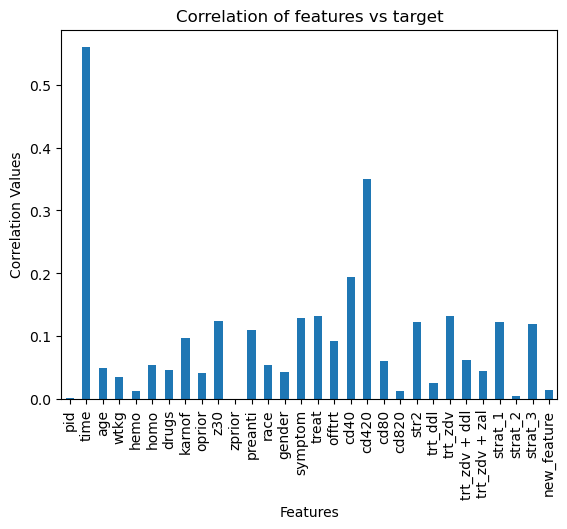

In [68]:
#Representation of the correlation of features vs target in Barplot
correlationVsTarget = cleanedCorrMatrix['target'].drop('target')
correlationVsTarget.plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Correlation Values')
plt.title('Correlation of features vs target')
plt.show()

In [69]:
#Dropping the column pid, hemo, zprior, cd820, new_feature.
df = df.drop(columns = ['pid','hemo','zprior','cd820','new_feature'])

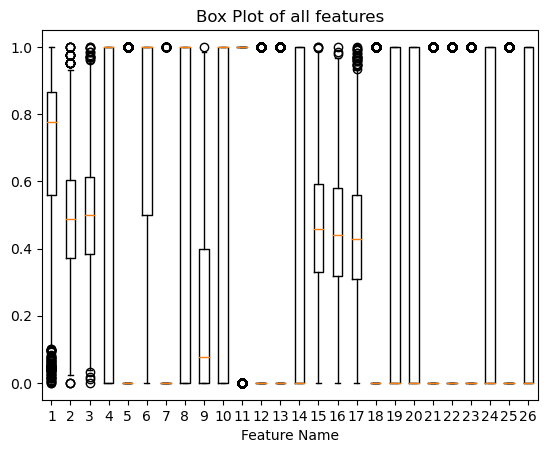

In [70]:
#Representation of all features in Box Plot
fig = plt.boxplot(df)
plt.xlabel('Feature Name')
plt.title('Box Plot of all features')
plt.show()

In [71]:
df.to_csv('cleaned.csv',index= False)

In [72]:
df.head()


,time,age,wtkg,homo,drugs,karnof,oprior,z30,preanti,race,...,cd80,target,str2,trt_ddl,trt_zdv,trt_zdv + ddl,trt_zdv + zal,strat_1,strat_2,strat_3
0,0.730219,0.813953,0.743961,0,0,1.0,0,0,0.000000,1,...,0.264454,0,1,0,0,0,1,1,0,0
3,0.938036,0.790698,0.671964,1,0,1.0,0,1,0.766156,1,...,0.779286,0,0,1,0,0,0,0,0,1
4,0.865586,0.697674,0.376351,1,0,1.0,0,1,0.740416,1,...,0.417295,0,0,0,1,0,0,0,0,1
5,0.952336,0.767442,0.729657,1,1,1.0,0,1,0.646769,1,...,0.412267,0,0,0,0,1,0,0,0,1
6,0.583413,0.418605,0.477273,1,0,1.0,0,1,0.509310,1,...,0.335847,1,0,0,1,0,0,0,0,1


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

y = df.target
X = df.drop(columns = ['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [74]:
print("Dimensions of X_train ",X_train.shape)
print("Dimensions of X_test ",X_test.shape)
print("Dimensions of y_train ",y_train.shape)
print("Dimensions of y_test ",y_test.shape)

Dimensions of X_train  (1691, 25)
Dimensions of X_test  (423, 25)
Dimensions of y_train  (1691,)
Dimensions of y_test  (423,)


In [75]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1', C = 0.9)
lr_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'lr_model.pkl'
joblib.dump(lr_model, model_filename)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
lr_precis, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = lr_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {lr_precis[0]:.4f}, Recall : {lr_recall[0]:.4f}, F1 Score : {lr_f1[0]:.4f}')
print(f'For Class 1 Precision : {lr_precis[1]:.4f}, Recall : {lr_recall[1]:.4f}, F1 Score : {lr_f1[1]:.4f}')

Logistic Regression Accuracy: 0.87
For Class 0 Precision : 0.9393, Recall : 0.8882, F1 Score : 0.9130
For Class 1 Precision : 0.6636, Recall : 0.7935, F1 Score : 0.7228


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


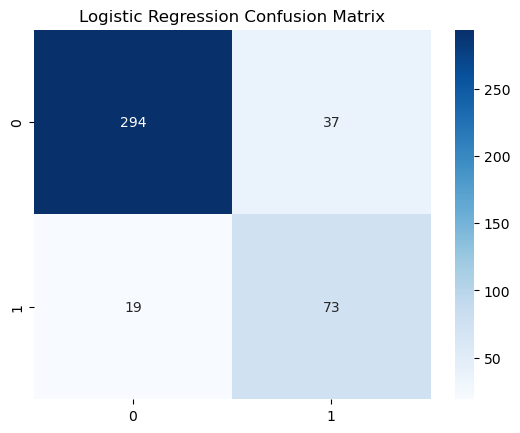

In [76]:
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure()
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

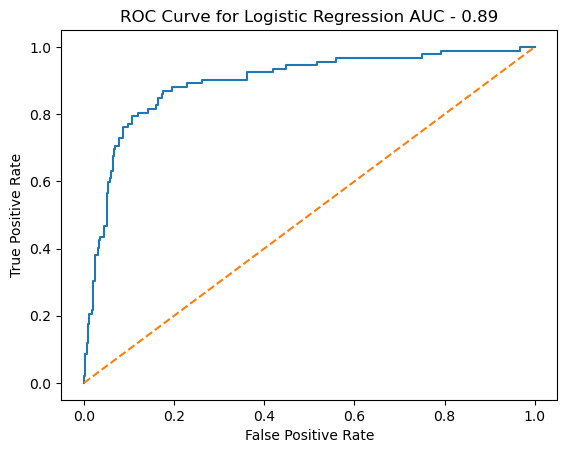

In [77]:
lr_outputs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_outputs)
lr_auc = roc_auc_score(y_test, lr_outputs)

plt.plot(lr_fpr, lr_tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression AUC - {:.2f}'.format(lr_auc))
plt.show()

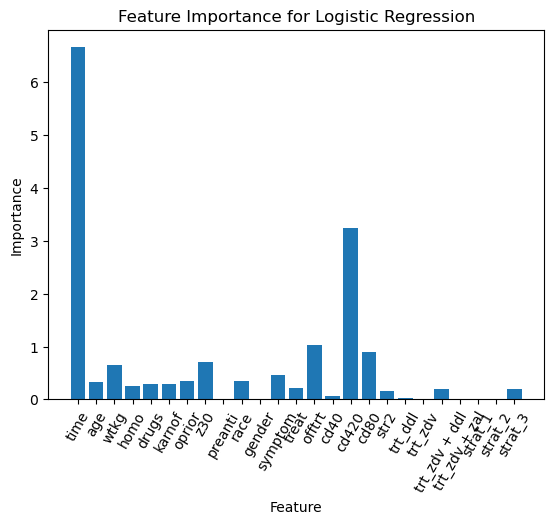

In [78]:
feature_importance = np.abs(lr_model.coef_[0])
plt.bar(X_test.columns.tolist(), feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Logistic Regression')
plt.xticks(rotation=60)
plt.show()

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski',p = 2, weights = 'distance')
knn_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'knn_model.pkl'
joblib.dump(knn_model, model_filename)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"k-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")
knn_precis, knn_recall, knn_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = knn_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {knn_precis[0]:.4f}, Recall : {knn_recall[0]:.4f}, F1 Score : {knn_f1[0]:.4f}')
print(f'For Class 1 Precision : {knn_precis[1]:.4f}, Recall : {knn_recall[1]:.4f}, F1 Score : {knn_f1[1]:.4f}')

k-Nearest Neighbors Accuracy: 0.82
For Class 0 Precision : 0.8396, Recall : 0.9486, F1 Score : 0.8908
For Class 1 Precision : 0.6531, Recall : 0.3478, F1 Score : 0.4539


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


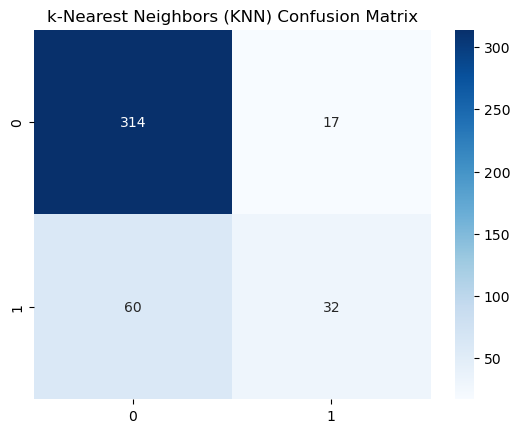

In [80]:
knn_cm = confusion_matrix(y_test, knn_predictions)
plt.figure()
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("k-Nearest Neighbors (KNN) Confusion Matrix")
plt.show()

In [83]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma = 0.1, C = 10)
svm_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'svm_model.pkl'
joblib.dump(svm_model, model_filename)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
svm_precis, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = svm_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {svm_precis[0]:.4f}, Recall : {svm_recall[0]:.4f}, F1 Score : {svm_f1[0]:.4f}')
print(f'For Class 1 Precision : {svm_precis[1]:.4f}, Recall : {svm_recall[1]:.4f}, F1 Score : {svm_f1[1]:.4f}')

SVM Accuracy: 0.88
For Class 0 Precision : 0.9043, Recall : 0.9426, F1 Score : 0.9231
For Class 1 Precision : 0.7564, Recall : 0.6413, F1 Score : 0.6941


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


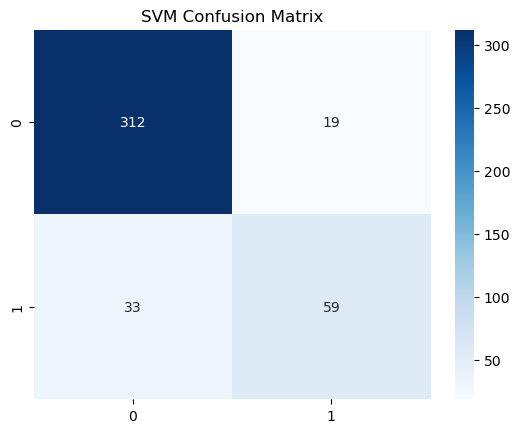

In [84]:
svm_cm = confusion_matrix(y_test, svm_predictions)
plt.figure()
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth = 7, class_weight = 'balanced')
dt_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'dt_model.pkl'
joblib.dump(dt_model, model_filename)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Decision Trees Accuracy: {dt_accuracy:.2f}")
dt_precis, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = dt_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {dt_precis[0]:.4f}, Recall : {dt_recall[0]:.4f}, F1 Score : {dt_f1[0]:.4f}')
print(f'For Class 1 Precision : {dt_precis[1]:.4f}, Recall : {dt_recall[1]:.4f}, F1 Score : {dt_f1[1]:.4f}')

Decision Trees Accuracy: 0.85
For Class 0 Precision : 0.9408, Recall : 0.8640, F1 Score : 0.9008
For Class 1 Precision : 0.6218, Recall : 0.8043, F1 Score : 0.7014


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


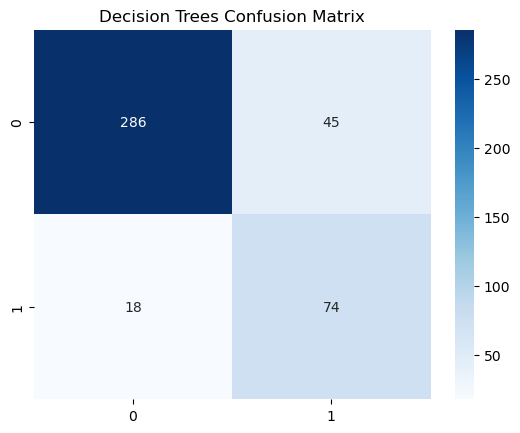

In [86]:
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure()
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Trees Confusion Matrix")
plt.show()

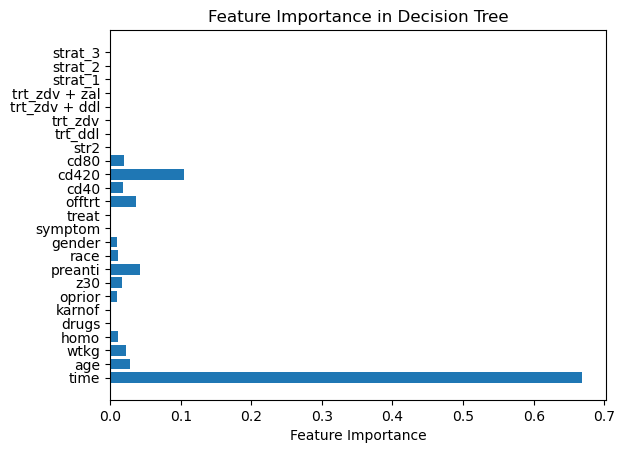

In [87]:
plt.barh(range(X_train.shape[1]), dt_model.feature_importances_, align='center')
plt.yticks(range(X_train.shape[1]), dt_model.feature_names_in_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

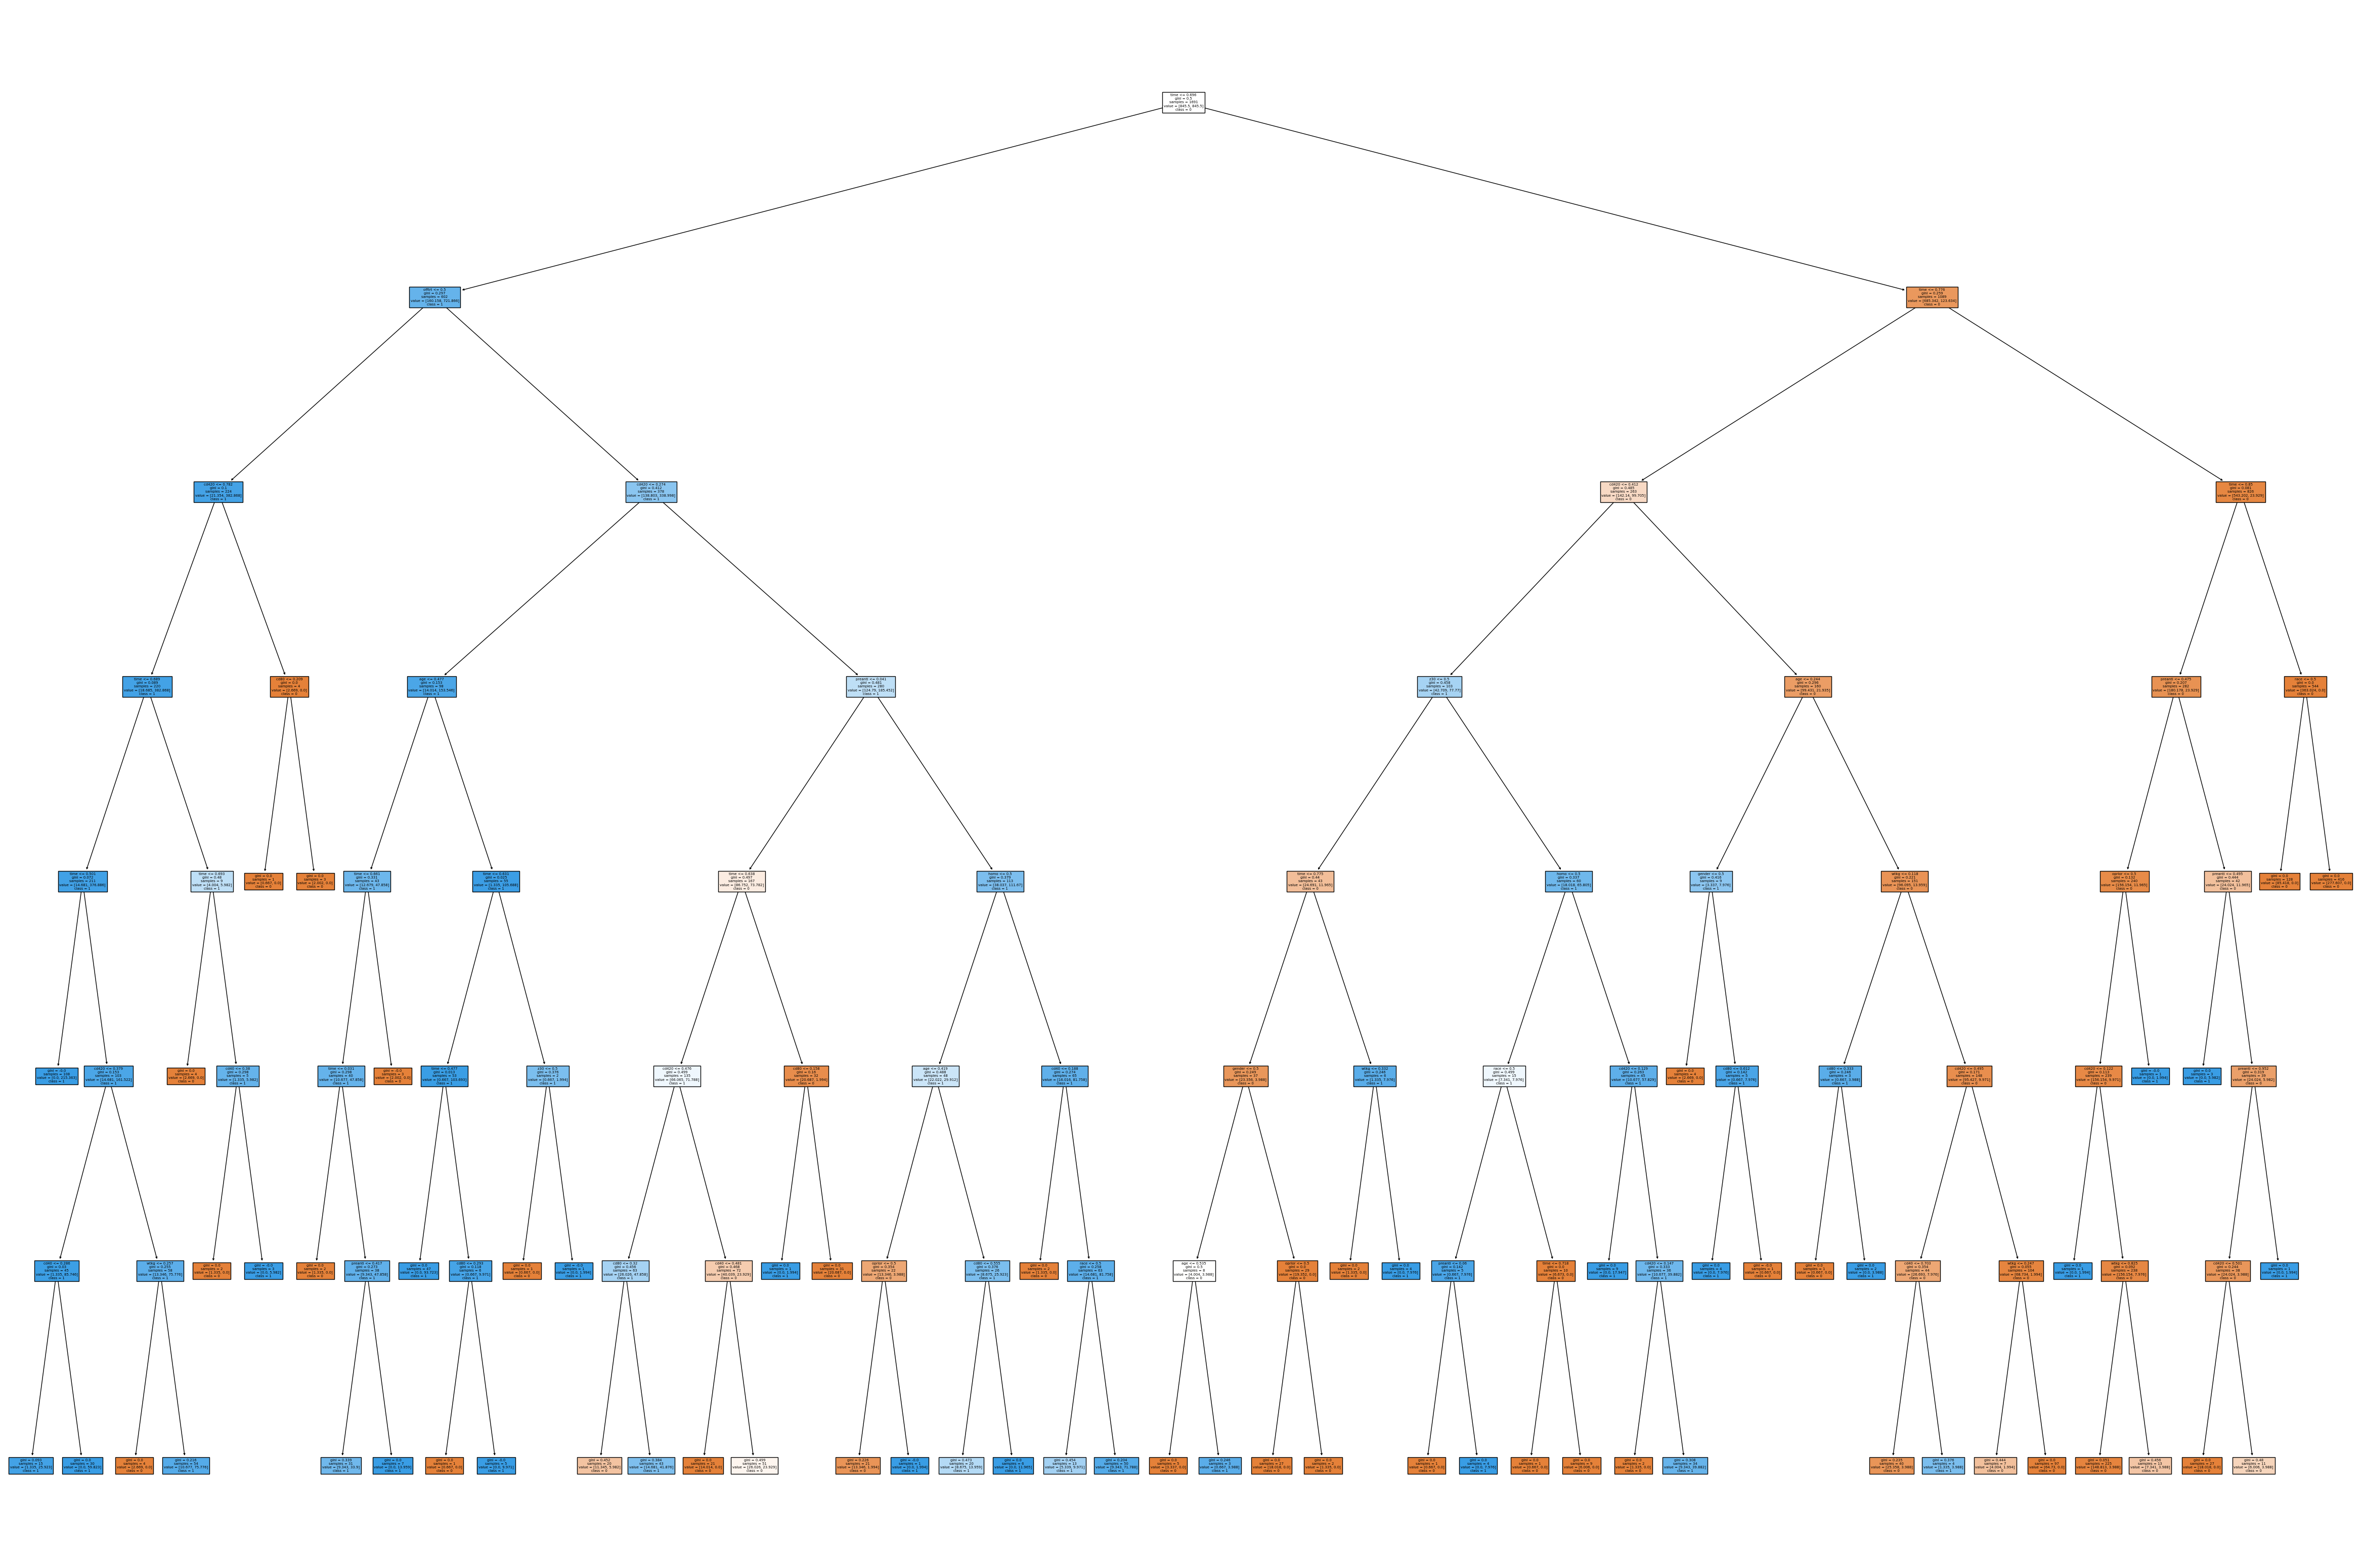

In [89]:
from sklearn import tree
plt.figure(figsize=(60, 40))
tree.plot_tree(dt_model, filled=True, feature_names=list(dt_model.feature_names_in_), class_names=['0','1'])
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=128, max_depth = 10, class_weight = 'balanced')
rf_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'rf_model.pkl'
joblib.dump(rf_model, model_filename)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
rf_precis, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = rf_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {rf_precis[0]:.4f}, Recall : {rf_recall[0]:.4f}, F1 Score : {rf_f1[0]:.4f}')
print(f'For Class 1 Precision : {rf_precis[1]:.4f}, Recall : {rf_recall[1]:.4f}, F1 Score : {rf_f1[1]:.4f}')

Random Forest Accuracy: 0.88
For Class 0 Precision : 0.9167, Recall : 0.9305, F1 Score : 0.9235
For Class 1 Precision : 0.7356, Recall : 0.6957, F1 Score : 0.7151


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


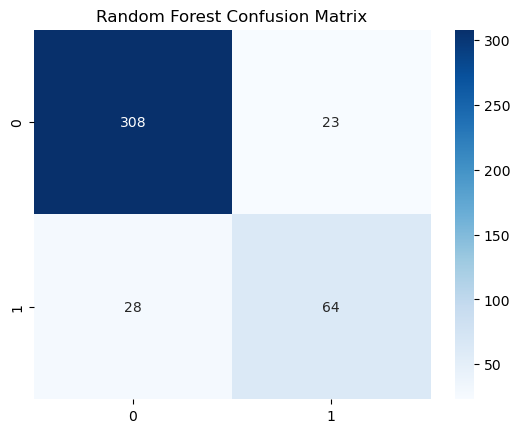

In [93]:
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure()
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

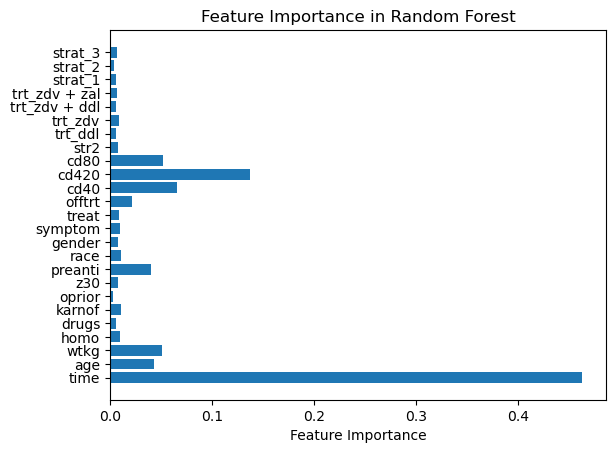

In [94]:
plt.barh(range(X_train.shape[1]), rf_model.feature_importances_, align='center')
plt.yticks(range(X_train.shape[1]), rf_model.feature_names_in_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

In [99]:
from xgboost import XGBClassifier, plot_importance

xgb_model = XGBClassifier(n_estimators = 256, max_depth = 7, eta = 0.01, scale_pos_weight = 3)
xgb_model.fit(X_train, y_train)
# Save the trained model to a file
model_filename = 'xgb_model.pkl'
joblib.dump(xgb_model, model_filename)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
xgb_precis, xgb_recall, xgb_f1, _ = precision_recall_fscore_support(y_true = y_test, y_pred = xgb_predictions, average = None, labels = ['0','1'])
print(f'For Class 0 Precision : {xgb_precis[0]:.4f}, Recall : {xgb_recall[0]:.4f}, F1 Score : {xgb_f1[0]:.4f}')
print(f'For Class 1 Precision : {xgb_precis[1]:.4f}, Recall : {xgb_recall[1]:.4f}, F1 Score : {xgb_f1[1]:.4f}')

XGBoost Accuracy: 0.87
For Class 0 Precision : 0.9369, Recall : 0.8973, F1 Score : 0.9167
For Class 1 Precision : 0.6792, Recall : 0.7826, F1 Score : 0.7273


C:\Users\surya_eyj1nxg\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


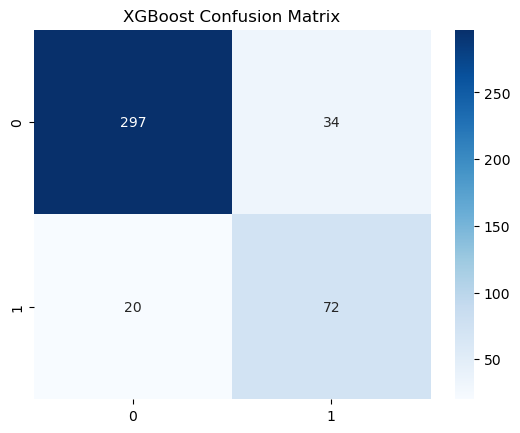

In [100]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plt.figure()
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

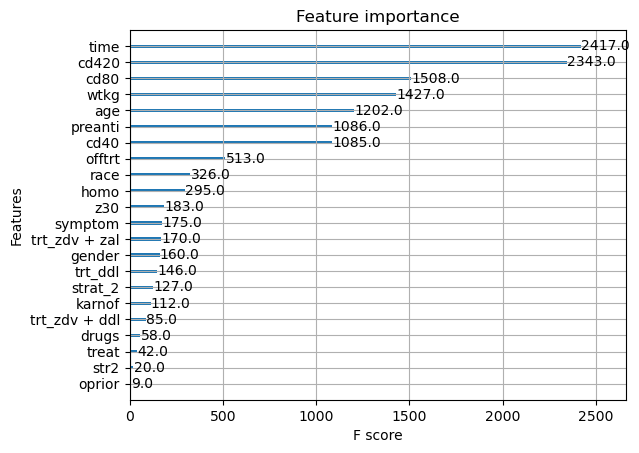

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 944.1 kB/s eta 0:01:46
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 0.3/99.8 MB 930.9 kB/s eta 0:01:47
   ---------------------------------------- 0.3/99.8 MB 893.0 kB/s eta 0:01:52
   ---------------------------------------- 0.3/99.8 MB 912.8 kB/s eta 0:01:49
   ---------------------------------------- 0.4/99.8 MB 922.1 kB/s eta 0:01:48
   ---------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\surya_eyj1nxg\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



In [101]:
plot_importance(xgb_model)

In [226]:
%%markdown
## References
1. https://docs.python.org/3/
2. https://numpy.org/doc/stable/
3. https://pandas.pydata.org/docs/
4. https://matplotlib.org/stable/index.html
5. https://scikit-learn.org/stable/
6. https://xgboost.readthedocs.io/en/stable/
7. https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175
8. https://seaborn.pydata.org/api.html

## References
1. https://docs.python.org/3/
2. https://numpy.org/doc/stable/
3. https://pandas.pydata.org/docs/
4. https://matplotlib.org/stable/index.html
5. https://scikit-learn.org/stable/
6. https://xgboost.readthedocs.io/en/stable/
7. https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175
8. https://seaborn.pydata.org/api.html
